# Exploratory Data Analysis

# Importing Modules

In [ ]:
# Data import
import os
import sqlite3 as sq3

# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Manipulation
from scipy import stats

# Data Processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Miscellaneous
import json  # For working with JSON files

# Setting up Notebook

In [2]:
# Set up seaborn to show appropriate size of plots
sns.set_context("notebook")

# Importing Data

In [3]:
def getPath(fileName):
    path = "data"

    return os.sep.join([path, fileName])

## Import from [`Database`]

### Sqlite

In [4]:
# Create a connection to the database
connection = sq3.connect(getPath("classic_rock.db"))

# Write the query
query = """
        SELECT *
        FROM rock_songs;
        """

# Execute the query
songs_data = pd.read_sql(query, connection)

read_sql() has many useful parameters
* head
* coerce_float              : Converts non-numeric columns to floats
* parse_dates               : Converts columns to datetime
* index_col                 : Sets the DataFrame index to a column
* chunksize                 : Return an iterable object for a specific number of rows

## Import from [`CSV`,`TSV`]

In [5]:
# Import CSV file
iris_data = pd.read_csv(getPath("iris_flowers.csv"))
gasoline_data = pd.read_csv(getPath("gasoline_prices.csv"))

# Import TSV file
housing_data = pd.read_csv(getPath("ames_housing.tsv"), sep="\t")

# Cleaning Data

## Manipulating Column

### Manipulating Column Names

### Manipulating Column Data

In [6]:
gasoline_data[["City", "Province"]] = gasoline_data["GEO"].str.split(
    ",", n=1, expand=True
)
gasoline_data.head(1).T

,0
REF_DATE,Jan-79
GEO,"St. John's, Newfoundland and Labrador"
DGUID,2011S0503001
Type of fuel,Regular unleaded gasoline at full service fill...
UOM,Cents per litre
UOM_ID,57
SCALAR_FACTOR,units
SCALAR_ID,0
VECTOR,v735046
COORDINATE,2.1


### Changing Column Format

In [7]:
gasoline_data["Date"] = pd.to_datetime(gasoline_data["REF_DATE"], format="%b-%y")
gasoline_data["Month"] = gasoline_data["Date"].dt.month_name().str.slice(stop=3)
gasoline_data["Year"] = gasoline_data["Date"].dt.year

gasoline_data.head(1).T

,0
REF_DATE,Jan-79
GEO,"St. John's, Newfoundland and Labrador"
DGUID,2011S0503001
Type of fuel,Regular unleaded gasoline at full service fill...
UOM,Cents per litre
UOM_ID,57
SCALAR_FACTOR,units
SCALAR_ID,0
VECTOR,v735046
COORDINATE,2.1


## Removing Duplicates

### Removing Duplicate Rows

In [8]:
# Drop duplicate rows
housing_data_dups_removed = housing_data.drop_duplicates()

print(
    f"Number of duplicate rows removed: {housing_data.shape[0] - housing_data_dups_removed.shape[0]}"
)

# Check if all the indexes are unique
housing_data_dups_removed.index.is_unique

Number of duplicate rows removed: 1


True

### Removing Duplicates of a Column

In [9]:
# Check if the 'Order' column has duplicate values
housing_data["Order"].is_unique

# .duplicated()         -- Returns a boolean series with True for duplicate rows
# .value_counts()       -- Returns the count of each unique value
housing_data.duplicated(["Order"]).value_counts()

# Drop duplicate rows based on the 'Order' column
housing_data.drop_duplicates(subset=["Order"])

print(
    f"Number of duplicate rows removed: {housing_data.shape[0] - housing_data_dups_removed.shape[0]}"
)

Number of duplicate rows removed: 1


## Handling Missing Values

### Dropping Rows

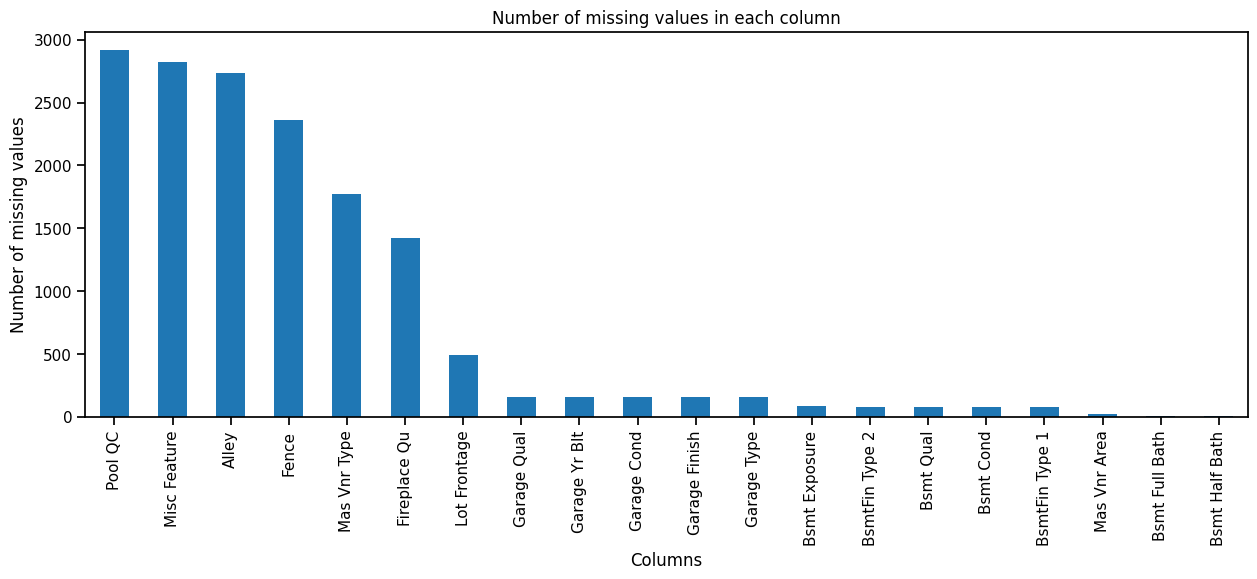

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [10]:
# Check number of missing values in each column
housing_data.isnull().sum().sort_values(ascending=False).head(20).plot(
    kind="bar", figsize=(15, 5)
)

# Setup the figure properties
plt.xlabel("Columns")
plt.ylabel("Number of missing values")
plt.title("Number of missing values in each column")
plt.show()

# Drop columns with specific columns with significant number of missing values
housing_data.drop("Lot Frontage", axis=1)

### Substituting with Median or Mean

In [11]:
# Fill missing values with the median value of the column
housing_data["Lot Frontage"] = housing_data["Lot Frontage"].fillna(
    housing_data["Lot Frontage"].median()
)

# Fill missing values with the mean value of the column
housing_data["Mas Vnr Area"] = housing_data["Mas Vnr Area"].fillna(
    housing_data["Mas Vnr Area"].mean()
)

## Handling Outliers

### Analysis

#### Uni-variate Analysis

<Axes: xlabel='SalePrice'>

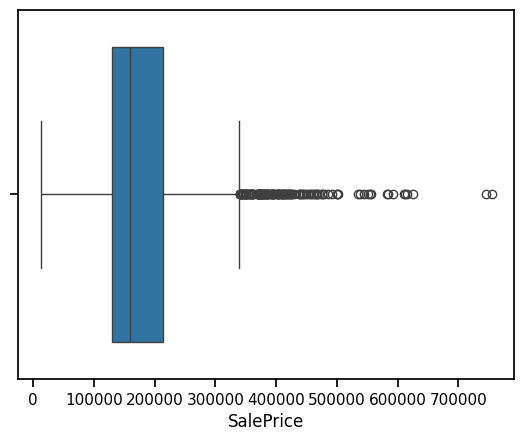

In [12]:
# Finding outliers in a dataset
sns.boxplot(x=housing_data["SalePrice"])

#### Bi-variate Analysis

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

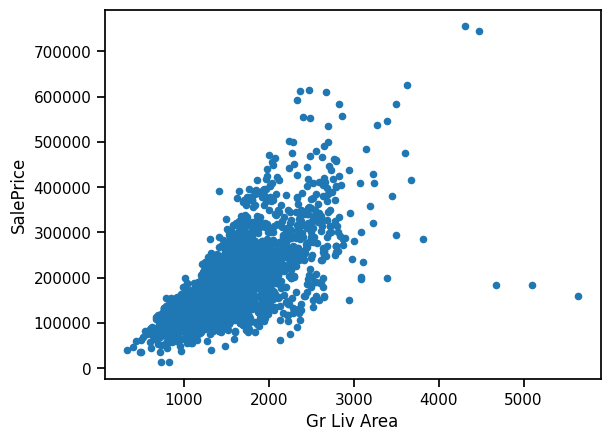

In [13]:
housing_data.plot.scatter(x="Gr Liv Area", y="SalePrice")

#### Z-Score Analysis

In [14]:
## Threshold -- Z -> 3 to -3

housing_data["LQFSF"] = stats.zscore(housing_data["Low Qual Fin SF"])

### Deleting Outliers

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

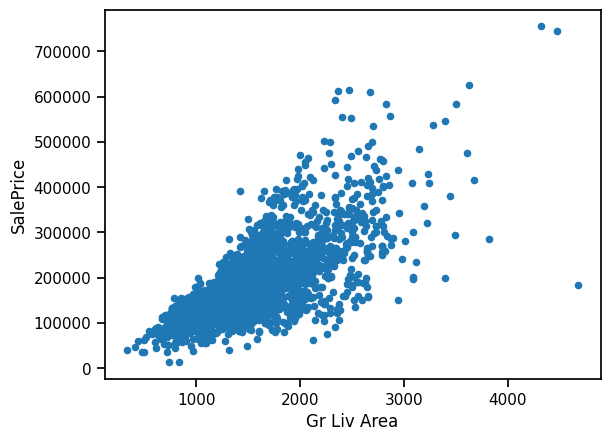

In [15]:
# Deleting specific rows
housing_data_non_null = housing_data.drop(housing_data.index[[1499, 2181]])
housing_data_non_null.plot.scatter(x="Gr Liv Area", y="SalePrice")

### Substituting Values

# Data Familiarization

## Introductory Analysis

In [16]:
# Display column names and data types
songs_data.info()

# Display the first 5 rows of the data
songs_data.head()

# Display the last 10 rows of the data
songs_data.tail(10)

# Display column properties
songs_data.describe()

# Display the number of unique values in each column
songs_data.nunique()

# Display the number of missing values in each column
songs_data.isnull().sum()

# Display the column names
songs_data.columns

# Displays transposed data
songs_data.T

# Display the data types of each column
songs_data.dtypes

# Display the shape of the data
songs_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Song          1650 non-null   object 
 1   Artist        1650 non-null   object 
 2   Release_Year  1650 non-null   float64
 3   PlayCount     1650 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 51.7+ KB


(1650, 4)

## Checking Basic Properties

In [17]:
# Checking column-wise properties
iris_data_props = iris_data.describe().round(2)

# Calculate value range in each column
iris_data_props.loc["range"] = (
    iris_data_props.loc["max"] - iris_data_props.loc["min"]
).round(2)
# Calculate inter-quartile range in each column
iris_data_props.loc["IQR"] = (
    iris_data_props.loc["75%"] - iris_data_props.loc["25%"]
).round(2)
# Calculate median in each column (50% is the median)
iris_data_props.rename({"50%": "median"}, inplace=True)

iris_data_props

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
median,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50
range,3.60,2.40,5.90,2.40
IQR,1.30,0.50,3.50,1.50


In [18]:
## Calculating aggregate statistics for different columns

# Make a aggregation dictionary
# Select all the properties to calculate for each column
agg_dict_iris = {
    "sepal_length": ["min", "max", "mean", "median", "std"],
    "sepal_width": ["min", "max"],
    "petal_length": ["min", "max", "mean", "median", "std"],
    "petal_width": ["mean", "median", "std"],
}

# Group by 'species' and calculate the aggregate statistics
iris_data.groupby("species").agg(agg_dict_iris).round(2)

sepal_length                         sepal_width      petal_length  \
                    min  max  mean median   std         min  max          min   
species                                                                         
setosa              4.3  5.8  5.01    5.0  0.35         2.3  4.4          1.0   
versicolor          4.9  7.0  5.94    5.9  0.52         2.0  3.4          3.0   
virginica           4.9  7.9  6.59    6.5  0.64         2.2  3.8          4.5   

                                   petal_width               
            max  mean median   std        mean median   std  
species                                                      
setosa      1.9  1.46   1.50  0.17        0.24    0.2  0.11  
versicolor  5.1  4.26   4.35  0.47        1.33    1.3  0.20  
virginica   6.9  5.55   5.55  0.55        2.03    2.0  0.27

## Finding Correlations

### Correlation Matrix

In [19]:
# Calculating the correlation matrix and selecting the strongly correlated columns
# .select_dtypes(include=[np.number])   -- Selects only numerical columns as correlation can only be calculated between numerical columns
# .corr()                               -- Calculates pairwise correlation of columns
# ['SalesPrice']                        -- Selects the target column
# .abs()                                -- Takes the absolute value of the correlation so that strength of correlation is can be compared
# .sort_values(ascending=False)         -- Sorts the values in descending order
# [1:]                                  -- Excludes the the first value as it will be the target column itself and value will be 1
# .loc[lambda x : x > 0.5]              -- Filters the values greater than 0.5 i.e. Strongly correlated
# .index                                -- Selects the column names
housing_top_features_cols = (
    housing_data.select_dtypes(include=[np.number])
    .corr()["SalePrice"]
    .abs()
    .sort_values(ascending=False)[1:]
    .loc[lambda x: x > 0.5]
    .index
)
print(housing_top_features_cols)

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath',
       'Year Remod/Add', 'Garage Yr Blt', 'Mas Vnr Area'],
      dtype='object')


### Pair Plot

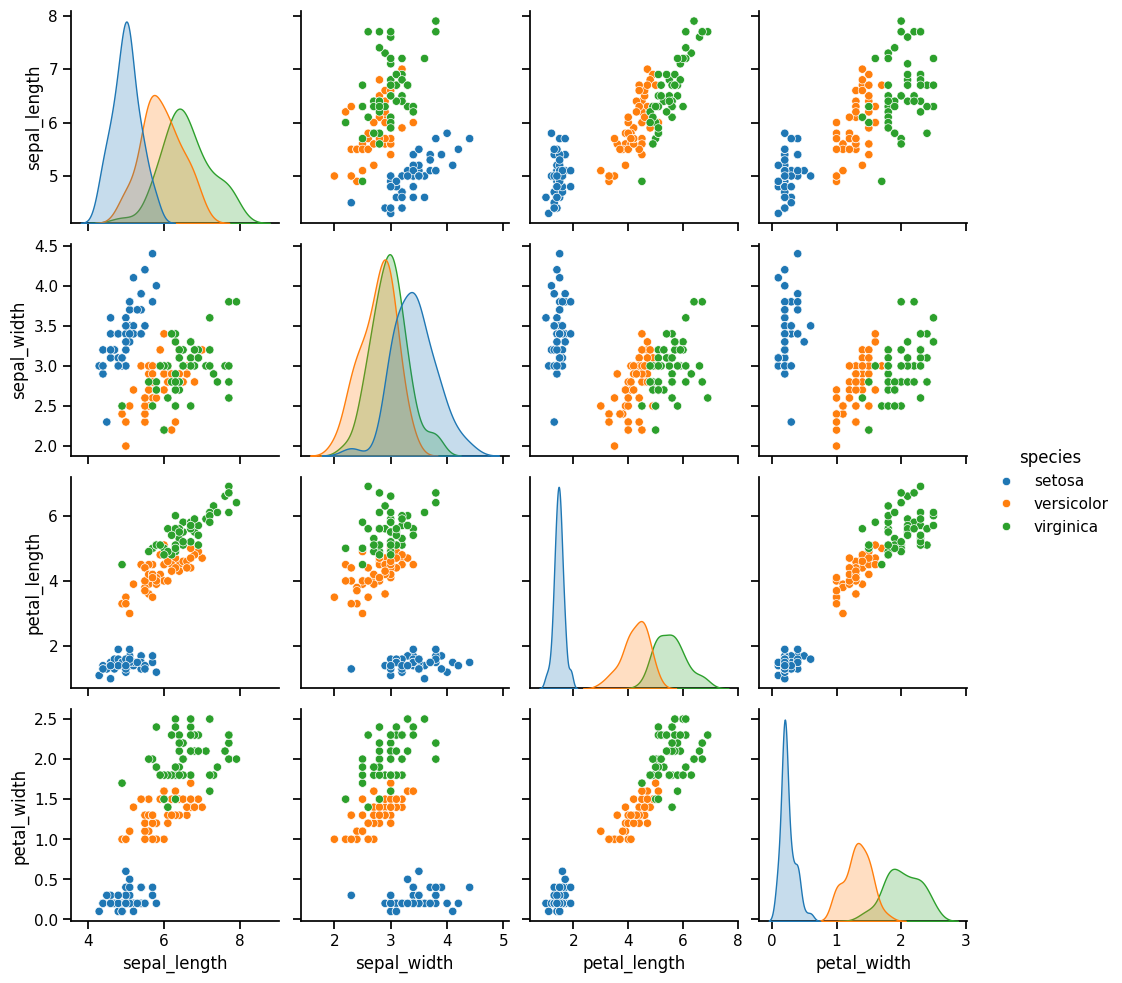

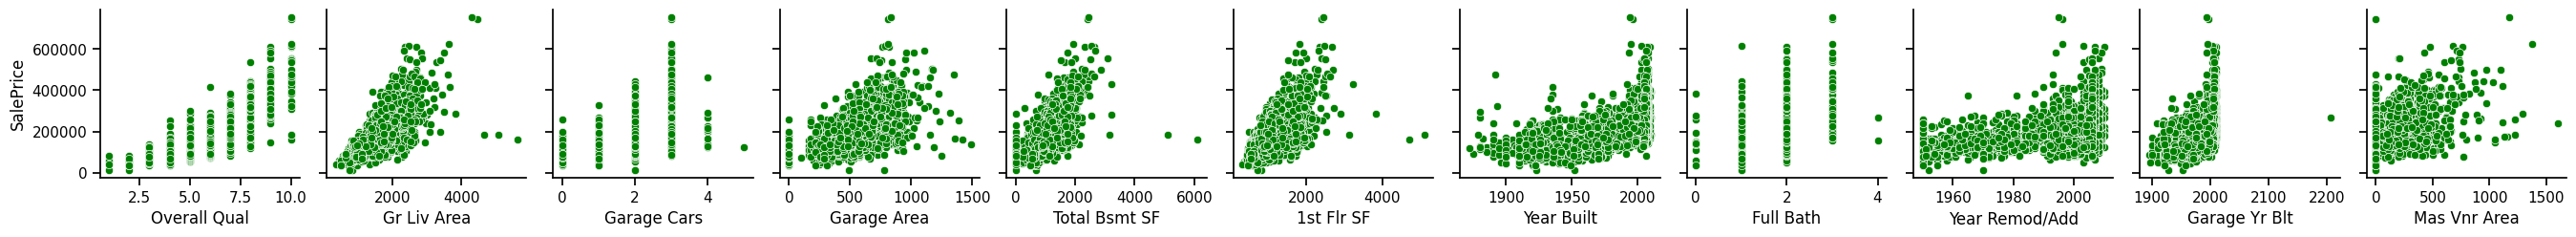

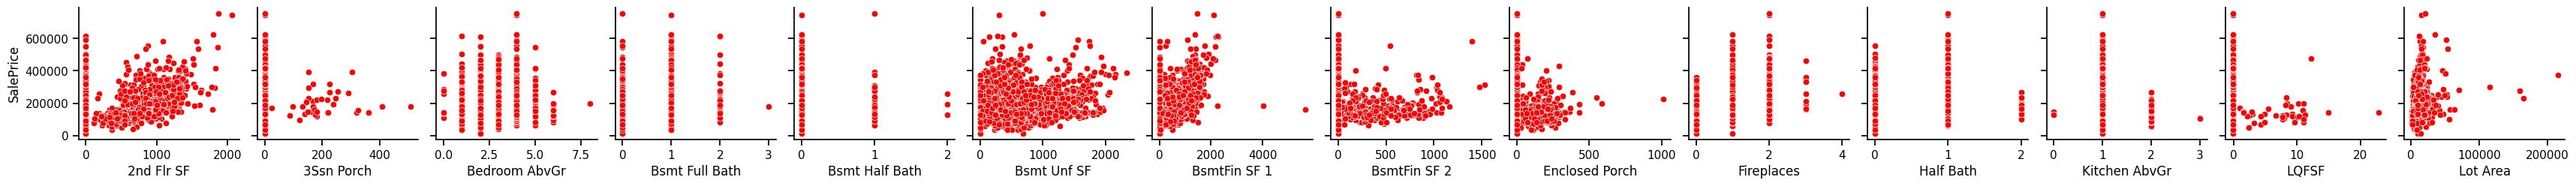

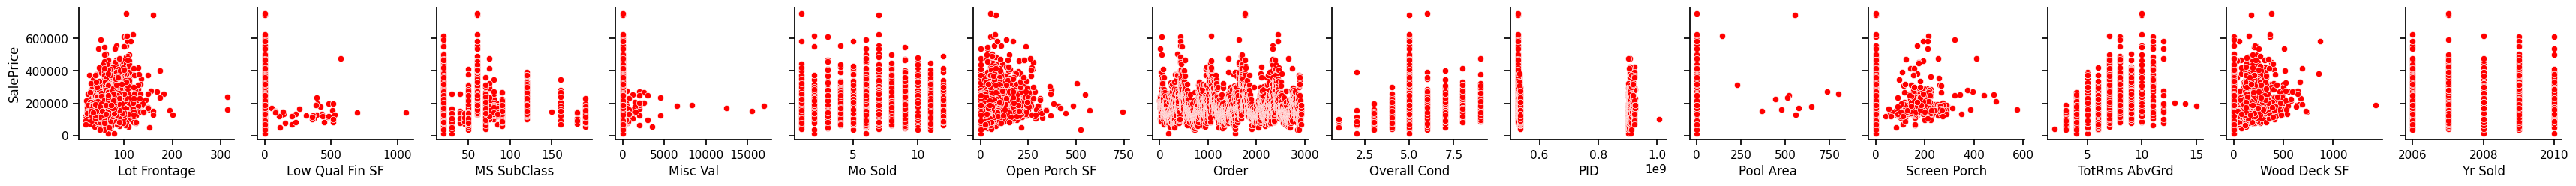

In [20]:
# Selecting numerical columns as pair plot can only be made between numerical columns
housing_data_num = housing_data.select_dtypes(include=[np.number])
housing_top_features = housing_data_num[housing_top_features_cols]

housing_weak_features = housing_data_num[
    housing_data_num.columns.difference(housing_top_features_cols).drop(["SalePrice"])
]

# Making pair plots for flowers dataset groped by species
sns.pairplot(iris_data, hue="species")

# Making pair plots of SalesPrice with strongly correlated column
for col in range(0, len(housing_top_features.columns), 12):
    sns.pairplot(
        data=housing_data_num,
        x_vars=housing_top_features.columns[col : col + 12],
        y_vars=["SalePrice"],
        plot_kws={"color": "green"},
    )

# Making pair plots of SalesPrice with each column
for col in range(0, len(housing_weak_features.columns), 14):
    sns.pairplot(
        data=housing_data_num,
        x_vars=housing_weak_features.columns[col : col + 14],
        y_vars=["SalePrice"],
        plot_kws={"color": "red"},
    )


# Preprocessing

## Normalizing

### Checking Normal Distribution

Skewness of SalePrice: 1.74


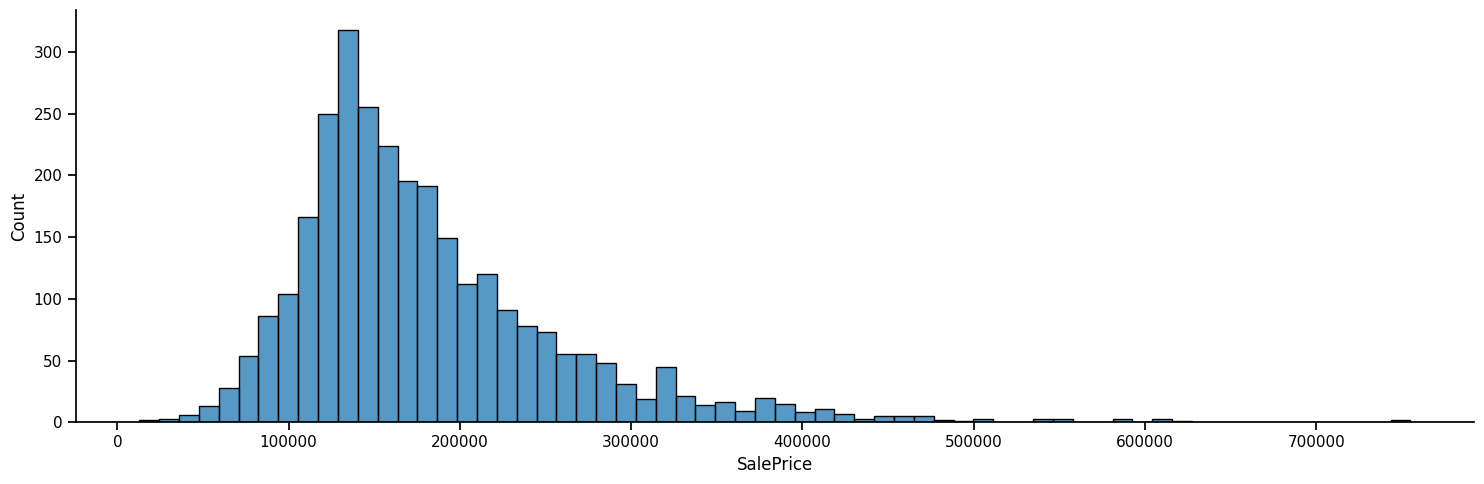

In [21]:
# Display the skewness of the SalePrice column
sales_price_skewness = housing_data["SalePrice"].skew()
print(f"Skewness of SalePrice: {sales_price_skewness.round(2)}")

# Display plot to check the distribution of SalePrice
sns.displot(housing_data["SalePrice"], aspect=3)


### Log Transformation

Skewness of SalePrice after log transformation: -0.02


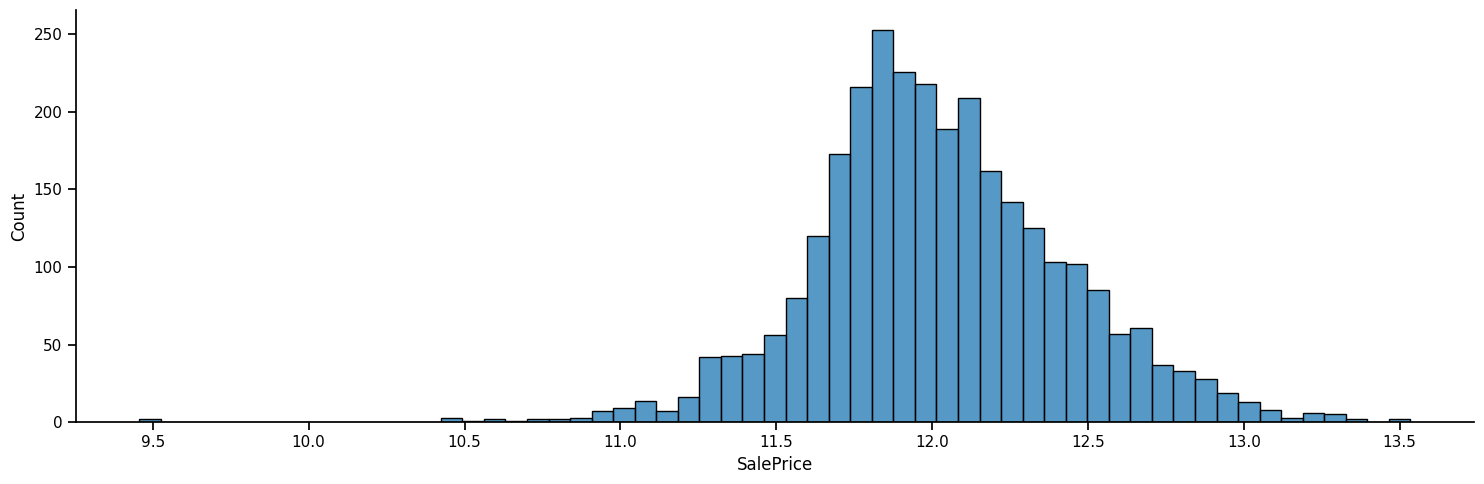

In [22]:
# Apply log transformation to the SalePrice column
sales_price_log_transformed = np.log(housing_data["SalePrice"])

# Checking the effect of log transformation on skewness
sales_price_log_transformed_skewness = sales_price_log_transformed.skew()
print(
    f"Skewness of SalePrice after log transformation: {sales_price_log_transformed_skewness.round(2)}"
)

# Display plot to check the distribution of SalePrice after log transformation
sns.displot(sales_price_log_transformed, aspect=3)

### Square Root Transformation ???

### BoxCox Transformation ???

## Feature Scaling

### Standard Scaling

In [23]:
StandardScaler().fit_transform(housing_data_num)

array([[-1.73027969, -0.99682434, -0.87674019, ...,  1.67740664,
         0.4281423 , -0.10098753],
       [-1.73027969, -0.99682434, -0.87674019, ...,  1.67740664,
         0.4281423 , -0.10098753],
       [-1.72909781, -0.99656498, -0.87674019, ...,  1.67740664,
        -0.94923488, -0.10098753],
       ...,
       [ 1.729097  ,  1.10758639,  0.64804102, ..., -1.36026952,
        -0.61115139, -0.10098753],
       [ 1.73027889,  1.11129572, -0.87674019, ..., -1.36026952,
        -0.13533019, -0.10098753],
       [ 1.73146077,  1.11156589,  0.06158671, ..., -1.36026952,
         0.09005881, -0.10098753]], shape=(2931, 40))

### Min Max Scaling

In [24]:
MinMaxScaler().fit_transform(housing_data_num)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 2.72444089e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 2.72444089e-01, 0.00000000e+00],
       [3.41413452e-04, 1.01788895e-04, 0.00000000e+00, ...,
        1.00000000e+00, 1.24238256e-01, 0.00000000e+00],
       ...,
       [9.99317173e-01, 8.25914814e-01, 3.82352941e-01, ...,
        0.00000000e+00, 1.60616051e-01, 0.00000000e+00],
       [9.99658587e-01, 8.27370610e-01, 0.00000000e+00, ...,
        0.00000000e+00, 2.11814430e-01, 0.00000000e+00],
       [1.00000000e+00, 8.27476641e-01, 2.35294118e-01, ...,
        0.00000000e+00, 2.36066294e-01, 0.00000000e+00]], shape=(2931, 40))

# Visualization

## MatPlotLib

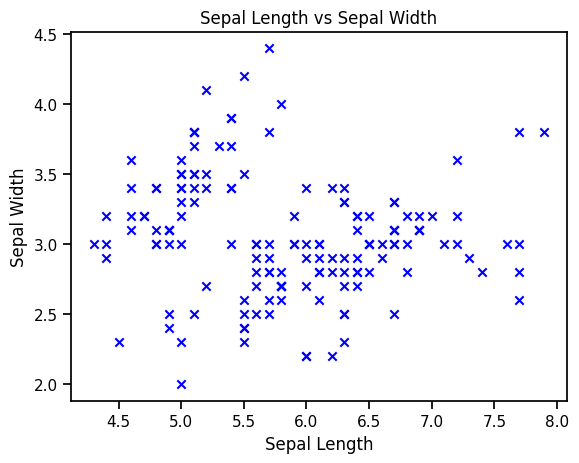

In [25]:
# Get axis object
ax = plt.axes()

# Make a Scatter Plot and set properties
ax.scatter(
    iris_data.sepal_length,
    iris_data.sepal_width,
    color="blue",
    marker="x",
)

# Setup properties of the axis
ax.set(
    xlabel="Sepal Length",
    ylabel="Sepal Width",
    title="Sepal Length vs Sepal Width",
)
plt.show()

## Seaborn

[Text(0.5, 0, 'Sepal Length'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Sepal Length')]

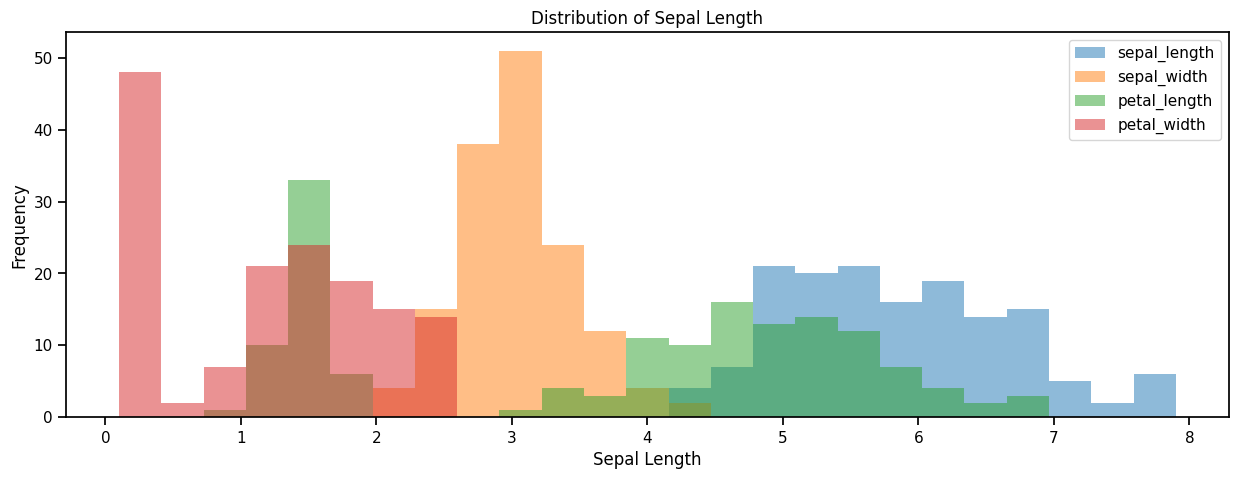

In [26]:
# Make a Histogram using the plot method (built-in method of pandas)
ax = iris_data.plot.hist(
    bins=25,
    alpha=0.5,
    figsize=(15, 5),
)

# Setup properties of the axis
ax.set(
    xlabel="Sepal Length",
    ylabel="Frequency",
    title="Distribution of Sepal Length",
)

## Plotly

In [31]:
# Getting data ready
gasoline_price_bycity = (
    gasoline_data.groupby(["Year", "City"])["VALUE"]
    .median()
    .reset_index(name="Value")
    .round(2)
)


fig = px.line(
    gasoline_price_bycity,
    x="Year",
    y="Value",
    color="City",
    color_discrete_sequence=px.colors.qualitative.Light24,
)

fig.update_traces(mode="markers+lines")
fig.update_layout(
    title="Gasoline Price Trend per City",
    xaxis_title="Year",
    yaxis_title="Annual Average Price, Cents per Litre",
)
fig.show()

fig = px.bar(
    gasoline_price_bycity,
    x="City",
    y="Value",
    animation_frame="Year",
)
fig.update_layout(
    title="Time Lapse of Average Price of Gasoline, by Province",
    xaxis_title="Year",
    yaxis_title="Average Price of Gasoline, Cents per Litre",
    yaxis=dict(range=[0, 150]),
)

fig.show()

In [40]:
gasoline_data_by_province = (
    gasoline_data[gasoline_data["Year"] == 2021]
    .groupby("Province")["VALUE"]
    .mean()
    .reset_index(name="Average Gasoline Price")
    .round(2)
)

provinces = {
    " Newfoundland and Labrador": 5,
    " Prince Edward Island": 8,
    " Nova Scotia": 2,
    " New Brunswick": 7,
    " Quebec": 1,
    " Ontario": 11,
    " Ontario part, Ontario/Quebec": 12,
    " Manitoba": 10,
    " Saskatchewan": 3,
    " Alberta": 4,
    " British Columbia": 6,
    " Yukon": 9,
    " Northwest Territories": 13,
}

# Add the ProvinceID column to the dataframe
gasoline_data_by_province["ProvinceID"] = gasoline_data_by_province["Province"].map(
    provinces
)
gasoline_data_by_province.head()

# Load the GeoJSON file to map province locations
provinces_geo = json.loads(open("data/gasoline_provinces.geojson", "r").read())

fig = px.choropleth(
    gasoline_data_by_province,
    locations="ProvinceID",
    geojson=provinces_geo,
    featureidkey="properties.cartodb_id",
    color="Average Gasoline Price",
    color_continuous_scale=px.colors.diverging.Temps,
    scope="north america",
    title="<b>Average Gasoline Price </b>",
    hover_name="Province",
    hover_data={"Average Gasoline Price": True, "ProvinceID": False},
    locationmode="geojson-id",
)
fig.update_layout(
    showlegend=True,
    height=900,
    legend_title_text="<b>Average Gasoline Price</b>",
    font={"size": 16, "color": "#808080", "family": "calibri"},
    margin={"r": 0, "t": 40, "l": 0, "b": 0},
    legend=dict(orientation="v"),
    geo=dict(bgcolor="rgba(0,0,0,0)", lakecolor="#e0fffe"),
)

# Show Canada only
fig.update_geos(
    showcountries=False,
    showcoastlines=False,
    showland=False,
    fitbounds="locations",
    subunitcolor="white",
)
fig.show()